In [1]:
import torch
import torchvision
from torchvision import transforms

import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
from torch.utils.data import Dataset
import numpy as np
import random
import cv2
import h5py

class TrainDataset(Dataset):
    def __init__(self, data_root, target_size=(512, 512), bgr2rgb=True):
        self.hypers = []
        self.bgrs = []
        hyper_data_path = f'{data_root}/Train_spectral/'
        bgr_data_path = f'{data_root}/Train_RGB/'
        with open(f'{data_root}/split_txt/Train_list.txt', 'r') as fin:
            hyper_list = [line.replace('\n', '.mat') for line in fin]
            bgr_list = [line.replace('mat','jpg') for line in hyper_list]
        hyper_list.sort()
        bgr_list.sort()
        print(f'len(hyper_Train) of ntire2022 dataset:{len(hyper_list)}')
        print(f'len(bgr_Train) of ntire2022 dataset:{len(bgr_list)}')
        for i in range(len(hyper_list)):
            hyper_path = hyper_data_path + hyper_list[i]
            if 'mat' not in hyper_path:
                continue
            with h5py.File(hyper_path, 'r') as mat:
                hyper = np.float32(np.array(mat['cube']))
            hyper = np.transpose(hyper, [0, 2, 1])
            bgr_path = bgr_data_path + bgr_list[i]
            assert hyper_list[i].split('.')[0] == bgr_list[i].split('.')[0], 'Hyper and RGB come from different scenes.'
            bgr = cv2.imread(bgr_path)
            if bgr2rgb:
                bgr = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
            bgr = np.float32(bgr)
            bgr = (bgr - bgr.min()) / (bgr.max() - bgr.min())
            bgr = np.transpose(bgr, [2, 0, 1])
            self.hypers.append(hyper)
            self.bgrs.append(bgr)
            mat.close()
            print(f'Ntire2022 scene {i} is loaded.')

    def __getitem__(self, idx):
        hyper = self.hypers[idx]
        bgr = self.bgrs[idx]
        target_size = (512,512)
        # Resize both hyper and bgr images to the target size
        hyper = cv2.resize(hyper.transpose(1, 2, 0), target_size).transpose(2, 0, 1)
        bgr = cv2.resize(bgr.transpose(1, 2, 0), target_size).transpose(2, 0, 1)
        
        return np.ascontiguousarray(bgr), np.ascontiguousarray(hyper)

    def __len__(self):
        return len(self.hypers)

class ValidDataset(Dataset):
    def __init__(self, data_root, target_size=(512, 512), bgr2rgb=True):
        self.hypers = []
        self.bgrs = []
        hyper_data_path = f'{data_root}/Valid_spectral/'
        bgr_data_path = f'{data_root}/Valid_RGB/'
        with open(f'{data_root}/split_txt/valid_list.txt', 'r') as fin:
            hyper_list = [line.replace('\n', '.mat') for line in fin]
            bgr_list = [line.replace('mat','jpg') for line in hyper_list]
        hyper_list.sort()
        bgr_list.sort()
        print(f'len(hyper_valid) of ntire2022 dataset:{len(hyper_list)}')
        print(f'len(bgr_valid) of ntire2022 dataset:{len(bgr_list)}')
        for i in range(len(hyper_list)):
            hyper_path = hyper_data_path + hyper_list[i]
            if 'mat' not in hyper_path:
                continue
            with h5py.File(hyper_path, 'r') as mat:
                hyper = np.float32(np.array(mat['cube']))
            hyper = np.transpose(hyper, [0, 2, 1])
            bgr_path = bgr_data_path + bgr_list[i]
            assert hyper_list[i].split('.')[0] == bgr_list[i].split('.')[0], 'Hyper and RGB come from different scenes.'
            bgr = cv2.imread(bgr_path)
            if bgr2rgb:
                bgr = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
            bgr = np.float32(bgr)
            bgr = (bgr - bgr.min()) / (bgr.max() - bgr.min())
            bgr = np.transpose(bgr, [2, 0, 1])
            self.hypers.append(hyper)
            self.bgrs.append(bgr)
            mat.close()
            print(f'Ntire2022 scene {i} is loaded.')

    def __getitem__(self, idx):
        hyper = self.hypers[idx]
        bgr = self.bgrs[idx]
#         print(hyper.shape)
        
        target_size = (512,512)
        # Resize both hyper and bgr images to the target size
        hyper = cv2.resize(hyper.transpose(1, 2, 0), target_size).transpose(2, 0, 1)
        bgr = cv2.resize(bgr.transpose(1, 2, 0), target_size).transpose(2, 0, 1)
#         print(hyper.shape)
        return np.ascontiguousarray(bgr), np.ascontiguousarray(hyper)

    def __len__(self):
        return len(self.hypers)

In [3]:
from torch.utils.data import DataLoader

# Define the dataset path
data_root = "C:/Users/user/Desktop/Research/Datasets/Manual_split_NTIRE_2022"

# Create instances of TrainDataset and ValidDataset
train_dataset = TrainDataset(data_root=data_root, bgr2rgb=True)
valid_dataset = ValidDataset(data_root=data_root, bgr2rgb=True)

# Create DataLoader instances for both datasets
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=1, shuffle=False)

# Load one batch of data from each DataLoader
train_images, train_labels = next(iter(train_loader))
valid_images, valid_labels = next(iter(valid_loader))

# Print the shapes of the loaded data
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Valid Images Shape:", valid_images.shape)
print("Valid Labels Shape:", valid_labels.shape)


len(hyper_Train) of ntire2022 dataset:797
len(bgr_Train) of ntire2022 dataset:797
Ntire2022 scene 0 is loaded.
Ntire2022 scene 1 is loaded.
Ntire2022 scene 2 is loaded.
Ntire2022 scene 3 is loaded.
Ntire2022 scene 4 is loaded.
Ntire2022 scene 5 is loaded.
Ntire2022 scene 6 is loaded.
Ntire2022 scene 7 is loaded.
Ntire2022 scene 8 is loaded.
Ntire2022 scene 9 is loaded.
Ntire2022 scene 10 is loaded.
Ntire2022 scene 11 is loaded.
Ntire2022 scene 12 is loaded.
Ntire2022 scene 13 is loaded.
Ntire2022 scene 14 is loaded.
Ntire2022 scene 15 is loaded.
Ntire2022 scene 16 is loaded.
Ntire2022 scene 17 is loaded.
Ntire2022 scene 18 is loaded.
Ntire2022 scene 19 is loaded.
Ntire2022 scene 20 is loaded.
Ntire2022 scene 21 is loaded.
Ntire2022 scene 22 is loaded.
Ntire2022 scene 23 is loaded.
Ntire2022 scene 24 is loaded.
Ntire2022 scene 25 is loaded.
Ntire2022 scene 26 is loaded.
Ntire2022 scene 27 is loaded.
Ntire2022 scene 28 is loaded.
Ntire2022 scene 29 is loaded.
Ntire2022 scene 30 is loaded

Ntire2022 scene 266 is loaded.
Ntire2022 scene 267 is loaded.
Ntire2022 scene 268 is loaded.
Ntire2022 scene 269 is loaded.
Ntire2022 scene 270 is loaded.
Ntire2022 scene 271 is loaded.
Ntire2022 scene 272 is loaded.
Ntire2022 scene 273 is loaded.
Ntire2022 scene 274 is loaded.
Ntire2022 scene 275 is loaded.
Ntire2022 scene 276 is loaded.
Ntire2022 scene 277 is loaded.
Ntire2022 scene 278 is loaded.
Ntire2022 scene 279 is loaded.
Ntire2022 scene 280 is loaded.
Ntire2022 scene 281 is loaded.
Ntire2022 scene 282 is loaded.
Ntire2022 scene 283 is loaded.
Ntire2022 scene 284 is loaded.
Ntire2022 scene 285 is loaded.
Ntire2022 scene 286 is loaded.
Ntire2022 scene 287 is loaded.
Ntire2022 scene 288 is loaded.
Ntire2022 scene 289 is loaded.
Ntire2022 scene 290 is loaded.
Ntire2022 scene 291 is loaded.
Ntire2022 scene 292 is loaded.
Ntire2022 scene 293 is loaded.
Ntire2022 scene 294 is loaded.
Ntire2022 scene 295 is loaded.
Ntire2022 scene 296 is loaded.
Ntire2022 scene 297 is loaded.
Ntire202

Ntire2022 scene 531 is loaded.
Ntire2022 scene 532 is loaded.
Ntire2022 scene 533 is loaded.
Ntire2022 scene 534 is loaded.
Ntire2022 scene 535 is loaded.
Ntire2022 scene 536 is loaded.
Ntire2022 scene 537 is loaded.
Ntire2022 scene 538 is loaded.
Ntire2022 scene 539 is loaded.
Ntire2022 scene 540 is loaded.
Ntire2022 scene 541 is loaded.
Ntire2022 scene 542 is loaded.
Ntire2022 scene 543 is loaded.
Ntire2022 scene 544 is loaded.
Ntire2022 scene 545 is loaded.
Ntire2022 scene 546 is loaded.
Ntire2022 scene 547 is loaded.
Ntire2022 scene 548 is loaded.
Ntire2022 scene 549 is loaded.
Ntire2022 scene 550 is loaded.
Ntire2022 scene 551 is loaded.
Ntire2022 scene 552 is loaded.
Ntire2022 scene 553 is loaded.
Ntire2022 scene 554 is loaded.
Ntire2022 scene 555 is loaded.
Ntire2022 scene 556 is loaded.
Ntire2022 scene 557 is loaded.
Ntire2022 scene 558 is loaded.
Ntire2022 scene 559 is loaded.
Ntire2022 scene 560 is loaded.
Ntire2022 scene 561 is loaded.
Ntire2022 scene 562 is loaded.
Ntire202

Ntire2022 scene 796 is loaded.
len(hyper_valid) of ntire2022 dataset:150
len(bgr_valid) of ntire2022 dataset:150
Ntire2022 scene 0 is loaded.
Ntire2022 scene 1 is loaded.
Ntire2022 scene 2 is loaded.
Ntire2022 scene 3 is loaded.
Ntire2022 scene 4 is loaded.
Ntire2022 scene 5 is loaded.
Ntire2022 scene 6 is loaded.
Ntire2022 scene 7 is loaded.
Ntire2022 scene 8 is loaded.
Ntire2022 scene 9 is loaded.
Ntire2022 scene 10 is loaded.
Ntire2022 scene 11 is loaded.
Ntire2022 scene 12 is loaded.
Ntire2022 scene 13 is loaded.
Ntire2022 scene 14 is loaded.
Ntire2022 scene 15 is loaded.
Ntire2022 scene 16 is loaded.
Ntire2022 scene 17 is loaded.
Ntire2022 scene 18 is loaded.
Ntire2022 scene 19 is loaded.
Ntire2022 scene 20 is loaded.
Ntire2022 scene 21 is loaded.
Ntire2022 scene 22 is loaded.
Ntire2022 scene 23 is loaded.
Ntire2022 scene 24 is loaded.
Ntire2022 scene 25 is loaded.
Ntire2022 scene 26 is loaded.
Ntire2022 scene 27 is loaded.
Ntire2022 scene 28 is loaded.
Ntire2022 scene 29 is loade

In [4]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 31, 512, 512]))

In [5]:
x, y = next(iter(valid_loader))
x.shape, y.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 31, 512, 512]))

In [6]:
len(train_dataset)

797

In [7]:
len(valid_dataset)

150

## Visualize the data

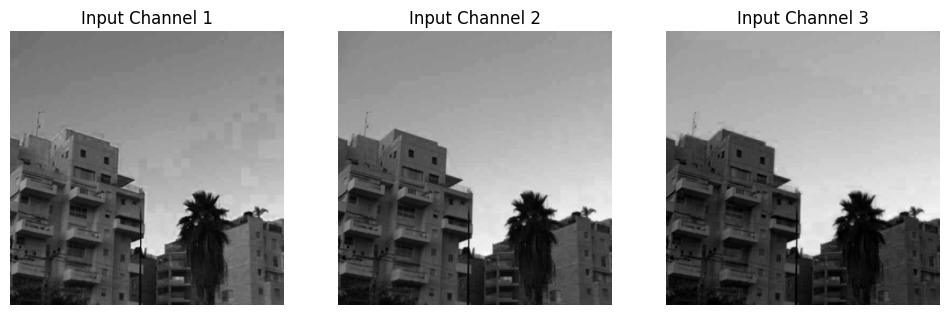

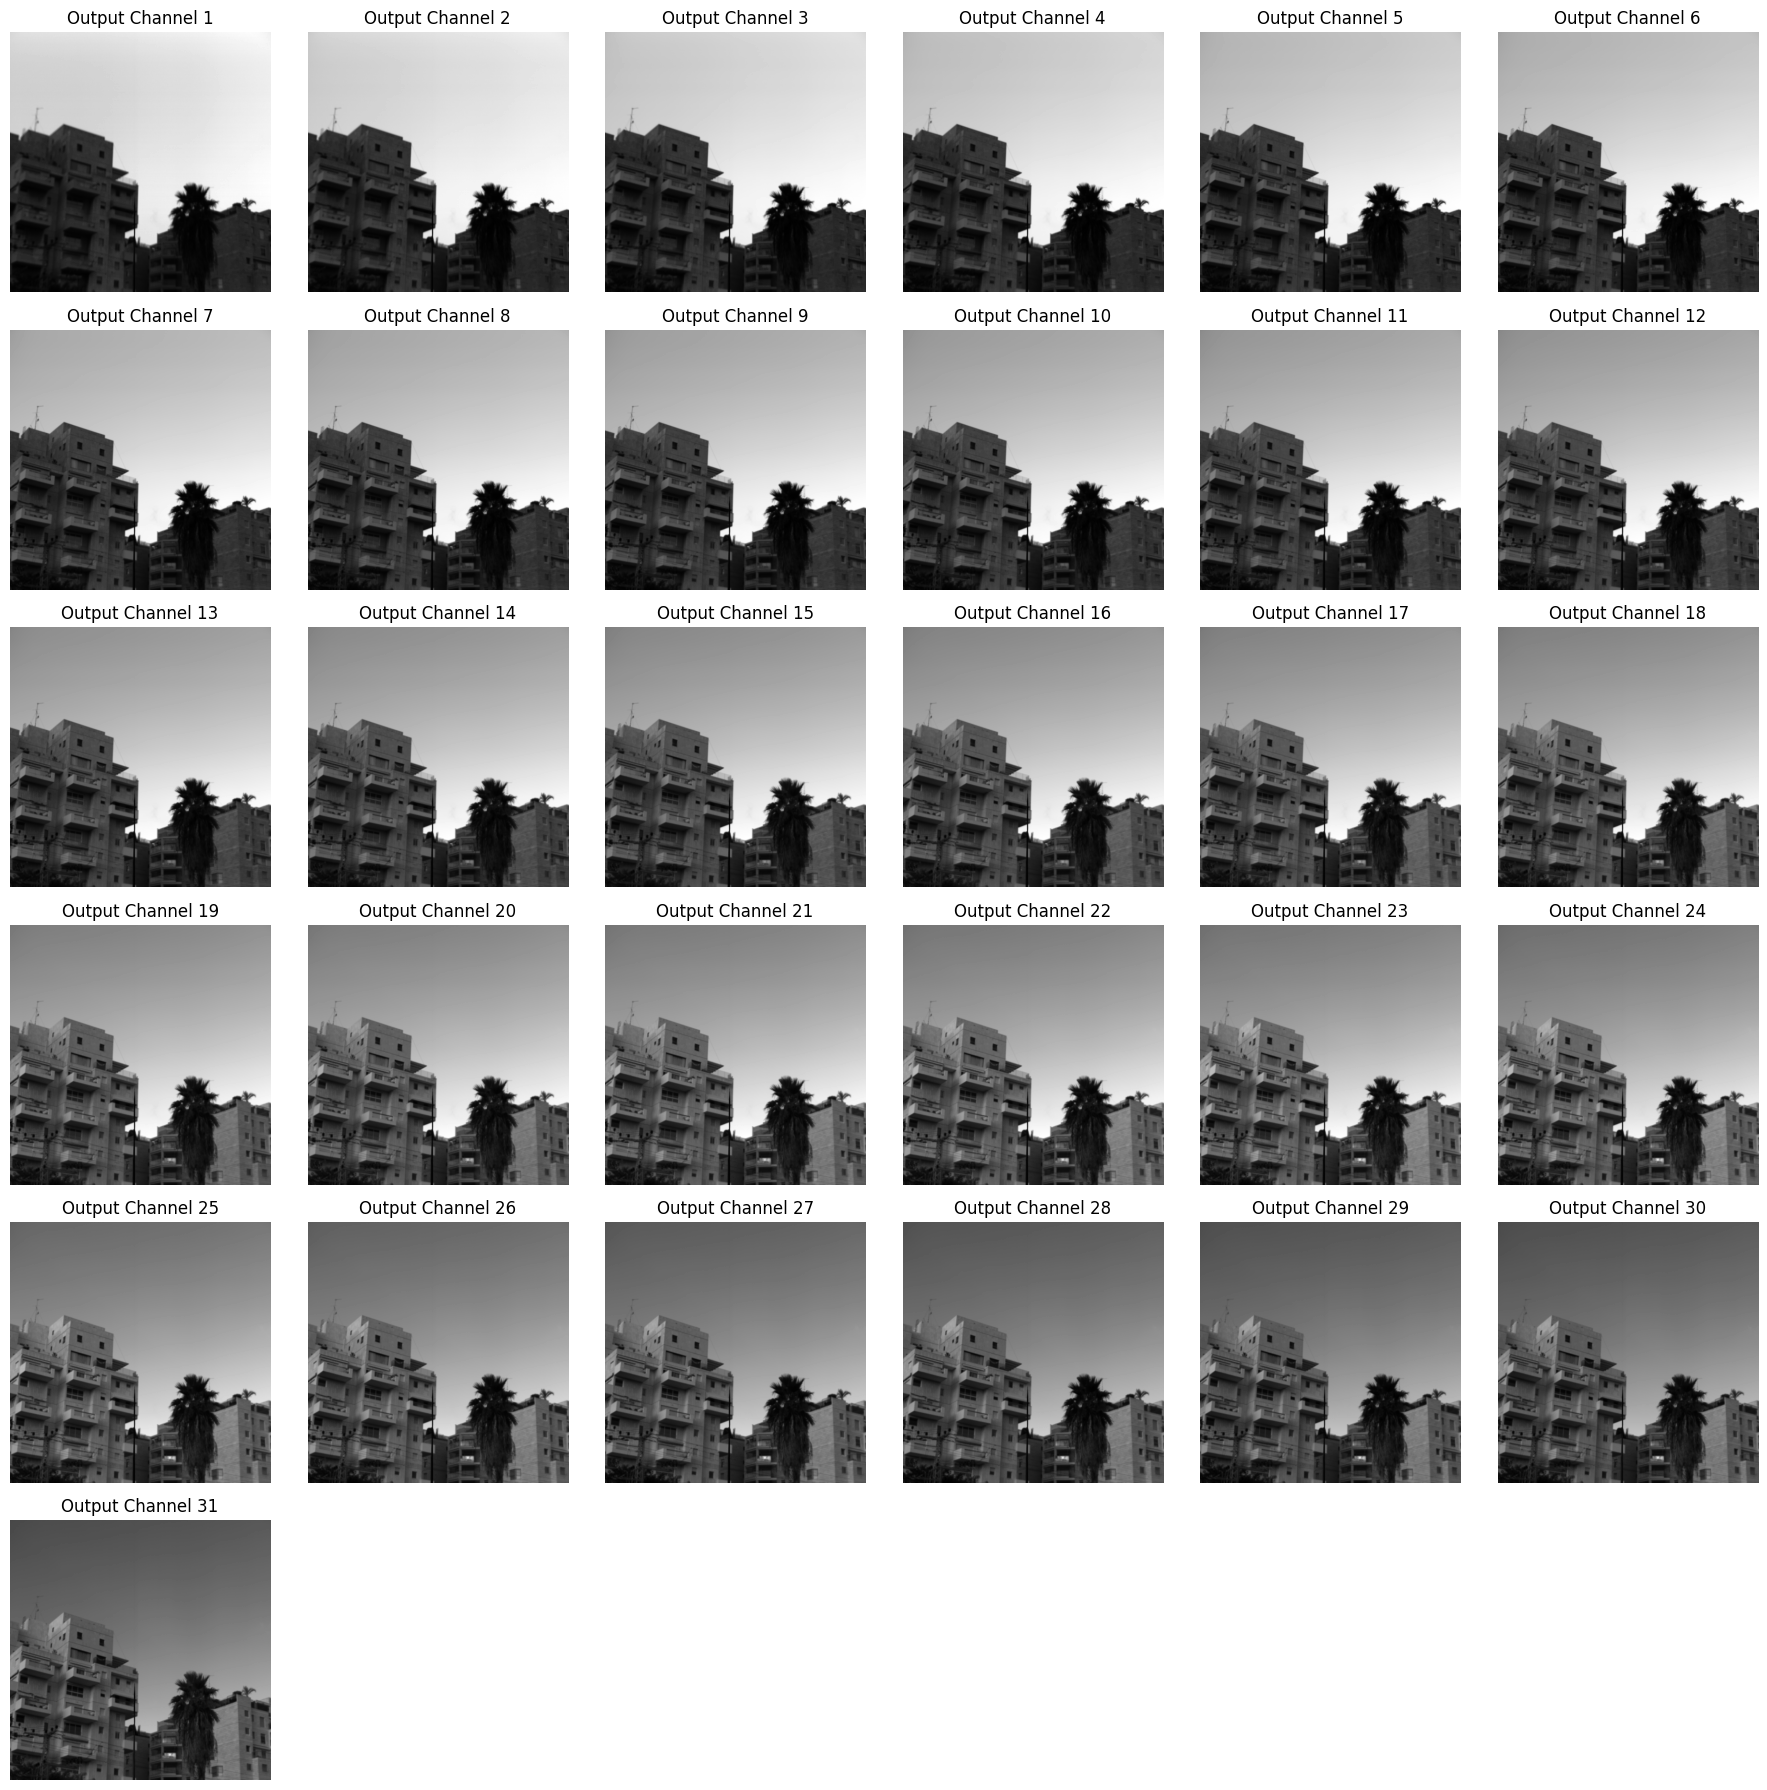

In [8]:
import matplotlib.pyplot as plt

sample = valid_dataset[100]
x, y = sample[0], sample[1]

# Create subplots for the 3-channel input (RGB)
plt.figure(figsize=(12, 4))
for i in range(x.shape[0]):  # Loop through channels
    plt.subplot(1, 3, i + 1)  # Adjust for the number of input channels (3)
    channel_data = x[i]
    plt.imshow(channel_data, cmap='gray')  # Display each channel in grayscale
    plt.title(f'Input Channel {i + 1}')
    plt.axis('off')

# Create subplots for the 31-channel output (Hyperspectral)
plt.figure(figsize=(18, 18))  # Adjust size as needed
for i in range(y.shape[0]):  # Loop through channels
    plt.subplot(6, 6, i + 1)  # Adjust subplot grid for 31 channels
    channel_data = y[i]
    plt.imshow(channel_data, cmap='gray')  # Display each channel in grayscale
    plt.title(f'Output Channel {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## custom SAM LOSS

In [9]:
import torch
import torch.nn as nn

class SAMLoss(nn.Module):
    def __init__(self):
        super(SAMLoss, self).__init__()

    def forward(self, predicted_hsi, ground_truth_hsi):
        # Ensure the input tensors have the same shape
        assert predicted_hsi.shape == ground_truth_hsi.shape, "Input tensor shapes must match."

        # Reshape tensors if necessary
        if predicted_hsi.dim() == 4:  # If the tensors are 4D, flatten them
            predicted_hsi = predicted_hsi.view(predicted_hsi.size(0), -1)
            ground_truth_hsi = ground_truth_hsi.view(ground_truth_hsi.size(0), -1)

        # Calculate the dot product and magnitudes
        dot_product = torch.sum(predicted_hsi * ground_truth_hsi, dim=1)
        magnitude_pred = torch.norm(predicted_hsi, dim=1)
        magnitude_gt = torch.norm(ground_truth_hsi, dim=1)

        # Calculate the cosine of the spectral angle
        cosine_theta = dot_product / (magnitude_pred * magnitude_gt)

        # Calculate the spectral angle in radians
        spectral_angle = torch.acos(cosine_theta)

        # Return the mean spectral angle as the loss
        return torch.mean(spectral_angle)


## combined loss L1loss and SAM

In [10]:
import torch.nn as nn

class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5):
        super(CombinedLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.l1_loss = nn.L1Loss()
        self.sam_loss = SAMLoss()

    def forward(self, outputs, labels):
        loss_l1 = self.l1_loss(outputs, labels)
        loss_sam = self.sam_loss(outputs, labels)
        combined_loss = self.alpha * loss_l1 + self.beta * loss_sam
        return combined_loss

class MseL1Loss(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5):
        super(MseL1Loss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.mse_loss = nn.MSELoss()
        self.l1_loss = nn.L1Loss()

    def forward(self, outputs, labels):
        loss_mse = self.mse_loss(outputs, labels)
        loss_l1 = self.l1_loss(outputs, labels)
        combined_loss = self.alpha * loss_mse + self.beta * loss_l1
        return combined_loss
    
    
class SRLoss(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5):
        super(SRLoss, self).__init__()
        self.alpha = alpha  # Weight for SAM loss
        self.beta = beta    # Weight for RMSE loss

        # Define the SAM and RMSE loss functions
        self.sam_loss = SAMLoss()
        self.rmse_loss = Loss_RMSE()

    def forward(self, outputs, labels):
        # Calculate the SAM loss
        sam_loss = self.sam_loss(outputs, labels)

        # Calculate the RMSE loss
        rmse_loss = self.rmse_loss(outputs, labels)

        # Combine the SAM and RMSE losses using weights (alpha and beta)
        combined_loss = self.alpha * sam_loss + self.beta * rmse_loss

        return combined_loss


## HyperAttention model with spacial, spectral attention and fft block

In [17]:
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SpectralAttention(nn.Module):
    def __init__(self, in_channels):
        super(SpectralAttention, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_pool = F.avg_pool2d(x, (x.size(2), x.size(3)))
        channel_weights = self.sigmoid(self.conv1(avg_pool))
        x_att = x * channel_weights
        return x_att


class SpatialAttention(nn.Module):
    def __init__(self, in_channels):
        super(SpatialAttention, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()
        self.batch_norm = nn.BatchNorm2d(in_channels)  # Batch Normalization

    def forward(self, x):
        x = self.batch_norm(x)  # Apply Batch Normalization
        spatial_weights = self.sigmoid(self.conv1(x))
        x_att = x * spatial_weights
        return x_att

class FFTInteraction(nn.Module):
    def __init__(self):
        super(FFTInteraction, self).__init__()

    def forward(self, x):
        fft_x = torch.fft.fft2(x)
        amplitude = torch.abs(fft_x)
        phase = torch.angle(fft_x)
        return amplitude, phase
    
class IFFTInteraction(nn.Module):
    def __init__(self):
        super(IFFTInteraction, self).__init__()

    def forward(self, amplitude, phase):
        # Combine amplitude and phase to get complex representation
        complex_representation = amplitude * torch.exp(1j * phase)

        # Perform inverse FFT
        ifft_result = torch.fft.ifft2(complex_representation)

        # Take the real part
        ifft_real = ifft_result.real

        return ifft_real
    
class OutputNormalization(nn.Module):
    def forward(self, x):
        min_val = torch.min(x)
        range_val = torch.max(x) - min_val
        return (x - min_val) / (range_val + 1e-8)


class HyperAttention(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(HyperAttention, self).__init__()

        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
        )

        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.en2_spatial_att = SpatialAttention(128)

        # Additional Residual Blocks for increased complexity
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.enc4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        
        self.fft_interaction = FFTInteraction()
        self.ifft_interaction = IFFTInteraction()
        
        self.output_norm = OutputNormalization()

        # Decoder with attention
        self.dec1 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            SpectralAttention(128),  # Spectral attention mechanism
            nn.ConvTranspose2d(128, 128, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
        )
        
        self.downscale_enc1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
        )

        
    def freeze_layers(self, layers_to_freeze):
        for name, child in self.named_children():
            if name in layers_to_freeze:
                for param in child.parameters():
                    param.requires_grad = False

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        print(f"Shape after enc1: {enc1.shape}")
        
        enc2 = self.enc2(enc1)
        print(f"Shape after enc2: {enc2.shape}")
        enc2 = self.en2_spatial_att(enc2)
        print(f"Shape after spatial attention on enc2: {enc2.shape}")
        
        enc3 = self.enc3(enc2)
        print(f"Shape after enc3: {enc3.shape}")
        
        enc4 = self.enc4(enc3)
        print(f"Shape after enc4: {enc4.shape}")
        
        # Use FFTInteraction on the input
        amp, ph_temp = self.fft_interaction(enc3)
        print(f"Shape after FFTInteraction on enc3: {amp.shape}")
        
        # Use FFTInteraction on the encoded result
        amp_temp, ph = self.fft_interaction(enc4)
        print(f"Shape after FFTInteraction on enc4: {amp_temp.shape}")
        
        # Use IFFTInteraction to combine amplitude and phase
        ifft_enc = self.ifft_interaction(amp, ph)
        print(f"Shape after IFFT interaction: {ifft_enc.shape}")
        
        # Combine the IFFT result with the original input
        enc4 = ifft_enc + enc4
        print(f"Shape after combining IFFT result with enc4: {enc4.shape}")

        enc1_adjusted = self.downscale_enc1(enc1)
        print(f"#{enc1_adjusted.shape}")
        enc1_adjusted = self.adjust_channels(enc1_adjusted, enc4.size(1))
        print(f"Shape after adjusting channels in enc1_adjusted: {enc1_adjusted.shape}")
        
        combined_features = enc4 + enc1_adjusted
        print(f"Shape after combining enc1_adjusted with enc4: {combined_features.shape}")

        # Decoder with attention
        dec1 = self.dec1(combined_features)
        print(f"Shape after dec1: {dec1.shape}")
        
        dec1 = self.output_norm(dec1)
        print(f"Shape after output_norm: {dec1.shape}")
        
        return dec1

    def adjust_channels(self, x, target_channels):
        if x.size(1) == target_channels:
            return x
        else:
            # Move the convolutional layer to the same device as the input tensor
            conv_layer = nn.Conv2d(x.size(1), target_channels, kernel_size=1).to(
                x.device
            )
            return conv_layer(x)
        
# Hyperparameters
learning_rate = 0.001

# Initialize the U-Net model, loss function, and optimizer
model = HyperAttention(in_channels=3, out_channels=31).to(device).float()  # Adjust out_channels to match the target label size
# Freeze specified layers
layers_to_freeze = ['enc3', 'enc4']
model.freeze_layers(layers_to_freeze)


# criterion = nn.MSELoss()
criterion = SAMLoss()
# criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
model_path = 'C:/Users/user/Desktop/Research/Models/HyperAttention_norm_2.0_freeze_700e.pth'  # Replace with your model path
model.load_state_dict(torch.load(model_path, map_location=device))
# model.train()

<All keys matched successfully>

## training

In [19]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Model, criterion, and other components initialization code remains the same

# Lists to store losses for plotting
train_losses = []
val_losses = []

# Set hyperparameters
batch_size = 1
learning_rate = 0.001  # Define the learning rate before the optimizer
num_epochs = 2000  # Number of epochs
checkpoint_interval = 200

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = HyperAttention(in_channels=3, out_channels=31).to(device).float()

# Initialize optimizer with beta parameters
beta1 = 0.9
beta2 = 0.999
optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(beta1, beta2))

# Define and initialize the cosine annealing scheduler
T_max = 150  # The number of epochs for cosine annealing
scheduler = CosineAnnealingLR(optimizer, T_max)

# loss
criterion = SAMLoss()
# Training and validation functions remain the same

best_val_loss = float('inf')

def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(train_loader)

# Function to validate the model
from piq import ssim, psnr

def validate_model(model, valid_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_ssim = 0.0
    running_psnr = 0.0

    with torch.no_grad():
        for inputs, labels in tqdm(valid_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Normalize outputs and labels to [0, 1] for SSIM and PSNR calculations
            outputs = torch.clamp(outputs, 0, 1)
            labels = torch.clamp(labels, 0, 1)

            # Calculate SSIM and PSNR for each batch
            batch_ssim = ssim(outputs, labels, data_range=1.0).item()
            batch_psnr = psnr(outputs, labels, data_range=1.0).item()
            running_ssim += batch_ssim
            running_psnr += batch_psnr

        avg_loss = running_loss / len(valid_loader)
        avg_ssim = running_ssim / len(valid_loader)
        avg_psnr = running_psnr / len(valid_loader)
        
    return avg_loss, avg_ssim, avg_psnr

# Main training loop with plotting
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    valid_loss, valid_ssim, valid_psnr = validate_model(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(valid_loss)

    # Live plot
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Epoch [{epoch+1}/{num_epochs}]')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Displaying the metrics
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, Valid SSIM: {valid_ssim:.4f}, Valid PSNR: {valid_psnr:.4f}')

    # Step the scheduler
    scheduler.step()

    # Check and save the best model
    if valid_loss < best_val_loss:
        best_val_loss = valid_loss
        torch.save(model.state_dict(), '../Models/best_HyperAttention_norm_2.0_freeze.pth')
        print(f"Best model saved with validation loss: {best_val_loss:.4f}.......")

    # Save checkpoint at specific intervals
    if (epoch + 1) % checkpoint_interval == 0:
        checkpoint_filename = f'../Models/checkpoints/HyperAttention_norm_2.0_freeze_epoch_{epoch+1}.pth'
        torch.save(model.state_dict(), checkpoint_filename)
        print(f"Checkpoint saved at epoch {epoch+1}")

# Save the final model
final_model_filename = '../Models/final_HyperAttention_norm_2.0_freeze.pth'
torch.save(model.state_dict(), final_model_filename)
print("Final model saved & training complete!")


  0%|          | 1/797 [00:00<04:27,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  0%|          | 2/797 [00:00<04:30,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  0%|          | 3/797 [00:01<04:30,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|          | 4/797 [00:01<04:26,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|          | 5/797 [00:01<04:32,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|          | 6/797 [00:02<04:24,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|          | 7/797 [00:02<04:39,  2.83it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|          | 8/797 [00:02<04:32,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|          | 9/797 [00:03<04:30,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|▏         | 10/797 [00:03<04:20,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  1%|▏         | 11/797 [00:03<04:30,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 12/797 [00:04<04:25,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 13/797 [00:04<04:21,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 14/797 [00:04<04:25,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 15/797 [00:05<04:13,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 16/797 [00:05<04:19,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 17/797 [00:05<04:11,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 18/797 [00:06<04:21,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  2%|▏         | 19/797 [00:06<04:14,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 20/797 [00:06<04:19,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 21/797 [00:07<04:11,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 22/797 [00:07<04:12,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 23/797 [00:07<04:15,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 24/797 [00:08<04:17,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 25/797 [00:08<04:17,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 26/797 [00:08<04:17,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  3%|▎         | 27/797 [00:08<04:04,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▎         | 28/797 [00:09<03:54,  3.27it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▎         | 29/797 [00:09<04:09,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▍         | 30/797 [00:09<04:07,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▍         | 31/797 [00:10<04:07,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▍         | 32/797 [00:10<04:11,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▍         | 33/797 [00:10<04:07,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▍         | 34/797 [00:11<04:08,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  4%|▍         | 35/797 [00:11<04:07,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▍         | 36/797 [00:11<04:08,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▍         | 37/797 [00:12<04:07,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▍         | 38/797 [00:12<04:15,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▍         | 39/797 [00:12<04:15,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▌         | 40/797 [00:13<04:20,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▌         | 41/797 [00:13<04:08,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▌         | 42/797 [00:13<03:56,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  5%|▌         | 43/797 [00:14<03:58,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▌         | 44/797 [00:14<03:57,  3.17it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▌         | 45/797 [00:14<03:59,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▌         | 46/797 [00:15<03:57,  3.17it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▌         | 47/797 [00:15<04:02,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▌         | 48/797 [00:15<03:58,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▌         | 49/797 [00:16<04:01,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▋         | 50/797 [00:16<04:05,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  6%|▋         | 51/797 [00:16<04:11,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 52/797 [00:17<04:12,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 53/797 [00:17<04:14,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 54/797 [00:17<04:14,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 55/797 [00:18<04:17,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 56/797 [00:18<04:13,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 57/797 [00:18<04:11,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 58/797 [00:19<04:03,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  7%|▋         | 59/797 [00:19<04:07,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 60/797 [00:19<04:04,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 61/797 [00:20<04:04,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 62/797 [00:20<04:02,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 63/797 [00:20<03:56,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 64/797 [00:21<03:58,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 65/797 [00:21<03:53,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 66/797 [00:21<03:52,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  8%|▊         | 67/797 [00:22<03:56,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▊         | 68/797 [00:22<03:48,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▊         | 69/797 [00:22<03:54,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▉         | 70/797 [00:23<03:53,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▉         | 71/797 [00:23<03:42,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▉         | 72/797 [00:23<04:00,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▉         | 73/797 [00:24<04:00,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▉         | 74/797 [00:24<03:53,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


  9%|▉         | 75/797 [00:24<04:05,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|▉         | 76/797 [00:25<04:22,  2.75it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|▉         | 77/797 [00:25<04:13,  2.84it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|▉         | 78/797 [00:25<04:17,  2.79it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|▉         | 79/797 [00:26<04:16,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|█         | 80/797 [00:26<04:05,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|█         | 81/797 [00:26<04:02,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|█         | 82/797 [00:27<03:53,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 10%|█         | 83/797 [00:27<03:48,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█         | 84/797 [00:27<03:43,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█         | 85/797 [00:28<03:48,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█         | 86/797 [00:28<03:41,  3.21it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█         | 87/797 [00:28<03:44,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█         | 88/797 [00:29<03:49,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█         | 89/797 [00:29<03:53,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█▏        | 90/797 [00:29<03:45,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 11%|█▏        | 91/797 [00:29<03:41,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 92/797 [00:30<03:48,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 93/797 [00:30<03:54,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 94/797 [00:31<04:00,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 95/797 [00:31<04:00,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 96/797 [00:31<03:47,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 97/797 [00:32<03:50,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 98/797 [00:32<03:49,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 12%|█▏        | 99/797 [00:32<04:00,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 100/797 [00:33<04:05,  2.84it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 101/797 [00:33<03:57,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 102/797 [00:33<03:56,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 103/797 [00:34<03:56,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 104/797 [00:34<03:56,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 105/797 [00:34<03:50,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 106/797 [00:35<03:49,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 13%|█▎        | 107/797 [00:35<03:42,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▎        | 108/797 [00:35<03:30,  3.27it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▎        | 109/797 [00:35<03:29,  3.28it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▍        | 110/797 [00:36<03:34,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▍        | 111/797 [00:36<03:45,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▍        | 112/797 [00:36<03:49,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▍        | 113/797 [00:37<04:04,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▍        | 114/797 [00:37<04:04,  2.79it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 14%|█▍        | 115/797 [00:38<03:58,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▍        | 116/797 [00:38<03:45,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▍        | 117/797 [00:38<03:44,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▍        | 118/797 [00:39<03:53,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▍        | 119/797 [00:39<03:44,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▌        | 120/797 [00:39<03:41,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▌        | 121/797 [00:40<03:49,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▌        | 122/797 [00:40<03:50,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 15%|█▌        | 123/797 [00:40<03:39,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▌        | 124/797 [00:41<03:40,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▌        | 125/797 [00:41<03:35,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▌        | 126/797 [00:41<03:33,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▌        | 127/797 [00:41<03:32,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▌        | 128/797 [00:42<03:38,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▌        | 129/797 [00:42<03:47,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▋        | 130/797 [00:43<03:47,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 16%|█▋        | 131/797 [00:43<04:10,  2.66it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 132/797 [00:43<03:52,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 133/797 [00:44<03:50,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 134/797 [00:44<03:36,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 135/797 [00:44<03:33,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 136/797 [00:44<03:18,  3.34it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 137/797 [00:45<03:42,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 138/797 [00:45<03:40,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 17%|█▋        | 139/797 [00:46<03:51,  2.85it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 140/797 [00:46<03:42,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 141/797 [00:46<03:42,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 142/797 [00:47<03:48,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 143/797 [00:47<03:48,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 144/797 [00:47<03:46,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 145/797 [00:48<03:33,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 146/797 [00:48<03:26,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 18%|█▊        | 147/797 [00:48<03:25,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▊        | 148/797 [00:49<03:24,  3.17it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▊        | 149/797 [00:49<03:23,  3.18it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▉        | 150/797 [00:49<03:27,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▉        | 151/797 [00:50<03:31,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▉        | 152/797 [00:50<03:45,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▉        | 153/797 [00:50<03:53,  2.76it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▉        | 154/797 [00:51<04:01,  2.67it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 19%|█▉        | 155/797 [00:51<03:52,  2.77it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|█▉        | 156/797 [00:51<03:51,  2.77it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|█▉        | 157/797 [00:52<03:53,  2.75it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|█▉        | 158/797 [00:52<03:41,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|█▉        | 159/797 [00:52<03:42,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|██        | 160/797 [00:53<03:29,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|██        | 161/797 [00:53<03:28,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|██        | 162/797 [00:53<03:25,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 20%|██        | 163/797 [00:54<03:29,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██        | 164/797 [00:54<03:28,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██        | 165/797 [00:54<03:29,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██        | 166/797 [00:55<03:26,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██        | 167/797 [00:55<03:38,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██        | 168/797 [00:55<03:45,  2.79it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██        | 169/797 [00:56<03:30,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██▏       | 170/797 [00:56<03:22,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 21%|██▏       | 171/797 [00:56<03:21,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 172/797 [00:57<03:20,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 173/797 [00:57<03:30,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 174/797 [00:57<03:42,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 175/797 [00:58<03:44,  2.77it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 176/797 [00:58<03:42,  2.79it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 177/797 [00:58<03:31,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 178/797 [00:59<03:26,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 22%|██▏       | 179/797 [00:59<03:23,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 180/797 [00:59<03:13,  3.18it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 181/797 [01:00<03:19,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 182/797 [01:00<03:21,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 183/797 [01:00<03:18,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 184/797 [01:01<03:14,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 185/797 [01:01<03:23,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 186/797 [01:01<03:20,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 23%|██▎       | 187/797 [01:02<03:20,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▎       | 188/797 [01:02<03:27,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▎       | 189/797 [01:02<03:21,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▍       | 190/797 [01:03<03:20,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▍       | 191/797 [01:03<03:15,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▍       | 192/797 [01:03<03:16,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▍       | 193/797 [01:04<03:08,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▍       | 194/797 [01:04<03:05,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 24%|██▍       | 195/797 [01:04<03:04,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▍       | 196/797 [01:05<03:14,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▍       | 197/797 [01:05<03:12,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▍       | 198/797 [01:05<03:07,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▍       | 199/797 [01:06<03:13,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▌       | 200/797 [01:06<03:19,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▌       | 201/797 [01:06<03:15,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▌       | 202/797 [01:07<03:12,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 25%|██▌       | 203/797 [01:07<03:11,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▌       | 204/797 [01:07<03:08,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▌       | 205/797 [01:07<03:06,  3.18it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▌       | 206/797 [01:08<03:07,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▌       | 207/797 [01:08<03:03,  3.21it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▌       | 208/797 [01:08<02:59,  3.29it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▌       | 209/797 [01:09<03:01,  3.24it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▋       | 210/797 [01:09<03:08,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 26%|██▋       | 211/797 [01:09<03:17,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 212/797 [01:10<03:18,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 213/797 [01:10<03:16,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 214/797 [01:10<03:16,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 215/797 [01:11<03:14,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 216/797 [01:11<03:08,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 217/797 [01:11<03:10,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 218/797 [01:12<03:06,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 27%|██▋       | 219/797 [01:12<03:02,  3.17it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 220/797 [01:12<03:04,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 221/797 [01:13<03:09,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 222/797 [01:13<03:08,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 223/797 [01:13<03:05,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 224/797 [01:14<03:13,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 225/797 [01:14<03:13,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 226/797 [01:14<03:02,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 28%|██▊       | 227/797 [01:15<03:07,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▊       | 228/797 [01:15<03:15,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▊       | 229/797 [01:15<03:15,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▉       | 230/797 [01:16<03:22,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▉       | 231/797 [01:16<03:16,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▉       | 232/797 [01:16<03:10,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▉       | 233/797 [01:17<03:06,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▉       | 234/797 [01:17<03:01,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 29%|██▉       | 235/797 [01:17<03:04,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|██▉       | 236/797 [01:18<03:01,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|██▉       | 237/797 [01:18<02:54,  3.22it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|██▉       | 238/797 [01:18<03:02,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|██▉       | 239/797 [01:19<03:06,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|███       | 240/797 [01:19<03:04,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|███       | 241/797 [01:19<02:54,  3.18it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|███       | 242/797 [01:20<02:45,  3.35it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 30%|███       | 243/797 [01:20<02:47,  3.31it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███       | 244/797 [01:20<02:45,  3.34it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███       | 245/797 [01:20<02:49,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███       | 246/797 [01:21<02:51,  3.21it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███       | 247/797 [01:21<02:51,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███       | 248/797 [01:21<02:52,  3.18it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███       | 249/797 [01:22<03:02,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███▏      | 250/797 [01:22<03:04,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 31%|███▏      | 251/797 [01:23<03:11,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 252/797 [01:23<03:16,  2.78it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 253/797 [01:23<03:11,  2.84it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 254/797 [01:24<03:25,  2.65it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 255/797 [01:24<03:12,  2.81it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 256/797 [01:24<03:18,  2.72it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 257/797 [01:25<03:07,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 258/797 [01:25<03:00,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 32%|███▏      | 259/797 [01:25<02:59,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 260/797 [01:26<02:59,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 261/797 [01:26<03:02,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 262/797 [01:26<03:04,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 263/797 [01:27<03:01,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 264/797 [01:27<02:54,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 265/797 [01:27<02:49,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 33%|███▎      | 266/797 [01:28<02:52,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▎      | 267/797 [01:28<03:02,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▎      | 268/797 [01:28<02:59,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▍      | 269/797 [01:29<03:05,  2.85it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▍      | 270/797 [01:29<02:57,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▍      | 271/797 [01:29<02:49,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▍      | 272/797 [01:30<02:49,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▍      | 273/797 [01:30<02:53,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 34%|███▍      | 274/797 [01:30<02:49,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▍      | 275/797 [01:31<02:50,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▍      | 276/797 [01:31<02:48,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▍      | 277/797 [01:31<02:43,  3.17it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▍      | 278/797 [01:32<02:49,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▌      | 279/797 [01:32<02:49,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▌      | 280/797 [01:32<02:50,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▌      | 281/797 [01:33<02:49,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 35%|███▌      | 282/797 [01:33<02:44,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▌      | 283/797 [01:33<02:37,  3.25it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▌      | 284/797 [01:33<02:35,  3.29it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▌      | 285/797 [01:34<02:42,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▌      | 286/797 [01:34<02:43,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▌      | 287/797 [01:34<02:47,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▌      | 288/797 [01:35<02:49,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▋      | 289/797 [01:35<02:47,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 36%|███▋      | 290/797 [01:35<02:47,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 291/797 [01:36<02:49,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 292/797 [01:36<02:49,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 293/797 [01:36<02:44,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 294/797 [01:37<02:45,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 295/797 [01:37<02:45,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 296/797 [01:37<02:46,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 297/797 [01:38<02:44,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 37%|███▋      | 298/797 [01:38<02:45,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 299/797 [01:38<02:44,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 300/797 [01:39<02:46,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 301/797 [01:39<02:49,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 302/797 [01:39<02:44,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 303/797 [01:40<02:48,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 304/797 [01:40<02:42,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 305/797 [01:40<02:43,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 38%|███▊      | 306/797 [01:41<02:55,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▊      | 307/797 [01:41<02:47,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▊      | 308/797 [01:42<02:47,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▉      | 309/797 [01:42<02:46,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▉      | 310/797 [01:42<02:38,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▉      | 311/797 [01:43<02:42,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▉      | 312/797 [01:43<02:36,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▉      | 313/797 [01:43<02:39,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 39%|███▉      | 314/797 [01:44<02:43,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|███▉      | 315/797 [01:44<02:54,  2.77it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|███▉      | 316/797 [01:44<02:52,  2.79it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|███▉      | 317/797 [01:45<03:01,  2.64it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|███▉      | 318/797 [01:45<02:54,  2.74it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|████      | 319/797 [01:45<02:46,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|████      | 320/797 [01:46<02:39,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|████      | 321/797 [01:46<02:36,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 40%|████      | 322/797 [01:46<02:31,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████      | 323/797 [01:47<02:34,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████      | 324/797 [01:47<02:36,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████      | 325/797 [01:47<02:40,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████      | 326/797 [01:48<02:40,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████      | 327/797 [01:48<02:41,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████      | 328/797 [01:48<02:44,  2.85it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████▏     | 329/797 [01:49<02:40,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 41%|████▏     | 330/797 [01:49<02:34,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 331/797 [01:49<02:31,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 332/797 [01:50<02:35,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 333/797 [01:50<02:28,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 334/797 [01:50<02:33,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 335/797 [01:51<02:28,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 336/797 [01:51<02:37,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 337/797 [01:51<02:35,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 42%|████▏     | 338/797 [01:52<02:42,  2.82it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 339/797 [01:52<02:47,  2.73it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 340/797 [01:52<02:45,  2.75it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 341/797 [01:53<02:30,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 342/797 [01:53<02:31,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 343/797 [01:53<02:19,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 344/797 [01:54<02:22,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 345/797 [01:54<02:19,  3.24it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 43%|████▎     | 346/797 [01:54<02:18,  3.27it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▎     | 347/797 [01:55<02:18,  3.25it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▎     | 348/797 [01:55<02:22,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▍     | 349/797 [01:55<02:23,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▍     | 350/797 [01:56<02:24,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▍     | 351/797 [01:56<02:27,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▍     | 352/797 [01:56<02:27,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▍     | 353/797 [01:57<02:39,  2.79it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 44%|████▍     | 354/797 [01:57<02:32,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▍     | 355/797 [01:57<02:29,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▍     | 356/797 [01:58<02:18,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▍     | 357/797 [01:58<02:24,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▍     | 358/797 [01:58<02:22,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▌     | 359/797 [01:59<02:20,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▌     | 360/797 [01:59<02:20,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▌     | 361/797 [01:59<02:23,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 45%|████▌     | 362/797 [02:00<02:20,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▌     | 363/797 [02:00<02:21,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▌     | 364/797 [02:00<02:24,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▌     | 365/797 [02:01<02:25,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▌     | 366/797 [02:01<02:26,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▌     | 367/797 [02:01<02:29,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▌     | 368/797 [02:02<02:18,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▋     | 369/797 [02:02<02:17,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 46%|████▋     | 370/797 [02:02<02:17,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 371/797 [02:02<02:18,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 372/797 [02:03<02:17,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 373/797 [02:03<02:18,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 374/797 [02:04<02:22,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 375/797 [02:04<02:21,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 376/797 [02:04<02:18,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 377/797 [02:04<02:17,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 47%|████▋     | 378/797 [02:05<02:23,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 379/797 [02:05<02:20,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 380/797 [02:05<02:18,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 381/797 [02:06<02:12,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 382/797 [02:06<02:17,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 383/797 [02:06<02:16,  3.04it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 384/797 [02:07<02:18,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 385/797 [02:07<02:15,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 48%|████▊     | 386/797 [02:07<02:11,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▊     | 387/797 [02:08<02:08,  3.19it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▊     | 388/797 [02:08<02:10,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▉     | 389/797 [02:08<02:13,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▉     | 390/797 [02:09<02:16,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▉     | 391/797 [02:09<02:17,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▉     | 392/797 [02:09<02:20,  2.89it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▉     | 393/797 [02:10<02:18,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 49%|████▉     | 394/797 [02:10<02:16,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|████▉     | 395/797 [02:10<02:16,  2.94it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|████▉     | 396/797 [02:11<02:14,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|████▉     | 397/797 [02:11<02:08,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|████▉     | 398/797 [02:11<02:09,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|█████     | 399/797 [02:12<02:12,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|█████     | 400/797 [02:12<02:11,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|█████     | 401/797 [02:12<02:16,  2.89it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 50%|█████     | 402/797 [02:13<02:12,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████     | 403/797 [02:13<02:04,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████     | 404/797 [02:13<02:02,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████     | 405/797 [02:14<01:59,  3.28it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████     | 406/797 [02:14<01:51,  3.51it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████     | 407/797 [02:14<01:57,  3.33it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████     | 408/797 [02:15<01:57,  3.32it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████▏    | 409/797 [02:15<01:59,  3.23it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 51%|█████▏    | 410/797 [02:15<02:01,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 411/797 [02:16<02:12,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 412/797 [02:16<02:10,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 413/797 [02:16<02:03,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 414/797 [02:17<02:01,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 415/797 [02:17<02:10,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 416/797 [02:17<02:07,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 417/797 [02:18<02:06,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 52%|█████▏    | 418/797 [02:18<02:00,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 419/797 [02:18<02:01,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 420/797 [02:19<02:04,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 421/797 [02:19<02:11,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 422/797 [02:19<02:15,  2.77it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 423/797 [02:20<02:09,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 424/797 [02:20<02:07,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 425/797 [02:20<02:05,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 53%|█████▎    | 426/797 [02:21<02:01,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▎    | 427/797 [02:21<02:01,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▎    | 428/797 [02:21<02:04,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▍    | 429/797 [02:22<02:03,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▍    | 430/797 [02:22<02:02,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▍    | 431/797 [02:22<02:03,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▍    | 432/797 [02:23<02:03,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▍    | 433/797 [02:23<01:56,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 54%|█████▍    | 434/797 [02:23<02:00,  3.02it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▍    | 435/797 [02:24<01:59,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▍    | 436/797 [02:24<02:03,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▍    | 437/797 [02:24<02:06,  2.84it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▍    | 438/797 [02:25<02:07,  2.82it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▌    | 439/797 [02:25<02:02,  2.91it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▌    | 440/797 [02:25<01:55,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▌    | 441/797 [02:26<01:54,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 55%|█████▌    | 442/797 [02:26<01:57,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▌    | 443/797 [02:26<02:03,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▌    | 444/797 [02:27<02:02,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▌    | 445/797 [02:27<01:55,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▌    | 446/797 [02:27<01:49,  3.20it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▌    | 447/797 [02:28<01:48,  3.22it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▌    | 448/797 [02:28<01:50,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▋    | 449/797 [02:28<01:52,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 56%|█████▋    | 450/797 [02:28<01:46,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 451/797 [02:29<01:45,  3.29it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 452/797 [02:29<01:48,  3.17it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 453/797 [02:30<02:00,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 454/797 [02:30<02:00,  2.86it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 455/797 [02:30<02:04,  2.74it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 456/797 [02:31<01:56,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 457/797 [02:31<01:53,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 57%|█████▋    | 458/797 [02:31<01:53,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 459/797 [02:32<01:53,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 460/797 [02:32<01:49,  3.09it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 461/797 [02:32<01:53,  2.96it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 462/797 [02:33<01:52,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 463/797 [02:33<01:48,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 464/797 [02:33<01:48,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 465/797 [02:34<01:51,  2.99it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 58%|█████▊    | 466/797 [02:34<01:53,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▊    | 467/797 [02:34<01:50,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▊    | 468/797 [02:35<01:51,  2.95it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▉    | 469/797 [02:35<01:51,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▉    | 470/797 [02:35<01:48,  3.01it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▉    | 471/797 [02:36<01:49,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▉    | 472/797 [02:36<01:46,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▉    | 473/797 [02:36<01:43,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 59%|█████▉    | 474/797 [02:37<01:43,  3.12it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|█████▉    | 475/797 [02:37<01:48,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|█████▉    | 476/797 [02:37<01:46,  3.03it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|█████▉    | 477/797 [02:38<01:45,  3.05it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|█████▉    | 478/797 [02:38<01:42,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|██████    | 479/797 [02:38<01:38,  3.24it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|██████    | 480/797 [02:38<01:36,  3.28it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|██████    | 481/797 [02:39<01:31,  3.45it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 60%|██████    | 482/797 [02:39<01:33,  3.36it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████    | 483/797 [02:39<01:36,  3.26it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████    | 484/797 [02:40<01:36,  3.25it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████    | 485/797 [02:40<01:44,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████    | 486/797 [02:40<01:45,  2.93it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████    | 487/797 [02:41<01:49,  2.84it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████    | 488/797 [02:41<01:51,  2.78it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████▏   | 489/797 [02:41<01:47,  2.87it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 61%|██████▏   | 490/797 [02:42<01:49,  2.81it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 491/797 [02:42<01:48,  2.82it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 492/797 [02:43<01:48,  2.81it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 493/797 [02:43<01:49,  2.77it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 494/797 [02:43<01:48,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 495/797 [02:44<01:46,  2.83it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 496/797 [02:44<01:49,  2.75it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 497/797 [02:44<01:47,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 62%|██████▏   | 498/797 [02:45<01:51,  2.67it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 499/797 [02:45<01:47,  2.78it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 500/797 [02:45<01:44,  2.85it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 501/797 [02:46<01:45,  2.80it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 502/797 [02:46<01:42,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 503/797 [02:46<01:41,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 504/797 [02:47<01:44,  2.81it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 505/797 [02:47<01:42,  2.85it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 63%|██████▎   | 506/797 [02:48<01:42,  2.83it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▎   | 507/797 [02:48<01:42,  2.83it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▎   | 508/797 [02:48<01:41,  2.85it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▍   | 509/797 [02:49<01:39,  2.89it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▍   | 510/797 [02:49<01:33,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▍   | 511/797 [02:49<01:33,  3.06it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▍   | 512/797 [02:50<01:35,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▍   | 513/797 [02:50<01:32,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 64%|██████▍   | 514/797 [02:50<01:32,  3.07it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▍   | 515/797 [02:50<01:30,  3.11it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▍   | 516/797 [02:51<01:36,  2.92it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▍   | 517/797 [02:51<01:33,  3.00it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▍   | 518/797 [02:52<01:38,  2.84it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▌   | 519/797 [02:52<01:36,  2.89it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▌   | 520/797 [02:52<01:26,  3.22it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▌   | 521/797 [02:52<01:27,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 65%|██████▌   | 522/797 [02:53<01:27,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▌   | 523/797 [02:53<01:27,  3.13it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▌   | 524/797 [02:53<01:27,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▌   | 525/797 [02:54<01:24,  3.23it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▌   | 526/797 [02:54<01:22,  3.28it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▌   | 527/797 [02:54<01:25,  3.14it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▌   | 528/797 [02:55<01:30,  2.97it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▋   | 529/797 [02:55<01:32,  2.89it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 66%|██████▋   | 530/797 [02:55<01:32,  2.90it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 531/797 [02:56<01:32,  2.88it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 532/797 [02:56<01:29,  2.98it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 533/797 [02:56<01:25,  3.10it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 534/797 [02:57<01:22,  3.18it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 535/797 [02:57<01:23,  3.15it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 536/797 [02:57<01:22,  3.16it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 537/797 [02:58<01:24,  3.08it/s]

Shape after enc1: torch.Size([1, 64, 256, 256])
Shape after enc2: torch.Size([1, 128, 128, 128])
Shape after spatial attention on enc2: torch.Size([1, 128, 128, 128])
Shape after enc3: torch.Size([1, 256, 64, 64])
Shape after enc4: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc3: torch.Size([1, 256, 64, 64])
Shape after FFTInteraction on enc4: torch.Size([1, 256, 64, 64])
Shape after IFFT interaction: torch.Size([1, 256, 64, 64])
Shape after combining IFFT result with enc4: torch.Size([1, 256, 64, 64])
#torch.Size([1, 256, 64, 64])
Shape after adjusting channels in enc1_adjusted: torch.Size([1, 256, 64, 64])
Shape after combining enc1_adjusted with enc4: torch.Size([1, 256, 64, 64])
Shape after dec1: torch.Size([1, 31, 512, 512])
Shape after output_norm: torch.Size([1, 31, 512, 512])


 67%|██████▋   | 537/797 [02:58<01:26,  3.01it/s]


KeyboardInterrupt: 

In [17]:
# Save the trained model
torch.save(model.state_dict(), '../Models/final_HyperAttention_norm_2.0_freeze.pth')

In [20]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Prediction of cubes and evaluation

## load the trained model

In [22]:
# model = HyperAttention(in_channels=3, out_channels=31).to(device).float()  # Adjust out_channels to match the target label size
# model.load_state_dict(torch.load('../Models/best_HyperAttention_aug2_new_split.pth', map_location=device))
model.eval() 

HyperAttention(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (en2_spatial_att): SpatialAttention(
    (conv1): Conv2d(128, 1, kernel_size=(1, 1), stride=(1, 1))
    (sigmoid): Sigmoid()
    (batch_norm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace

## predict on a single file with the model

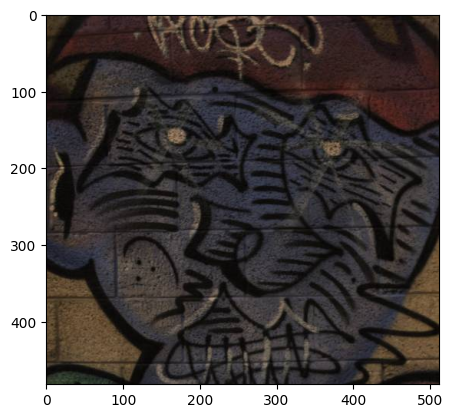

In [23]:
# image_path = "C:/Users/user/Desktop/HSI/dataset/ICASSP2024-SPGC/Hyper-Skin(RGB,VIS)/test/RGB_CIE/p012_neutral_front.jpg"
image_path = 'C:/Users/user/Desktop/Research/NTIRE_2022/NTIRE_2022/Test_RGB/ARAD_1K_0951.jpg'
image = Image.open(image_path)
plt.imshow(image)

In [24]:
image.size

(512, 482)

In [25]:
# Define transformations to convert and preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the image to match your model's input size
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
])

# Apply the transformations to the image
input_data = preprocess(image)

# Add an extra dimension to match the batch size (1 image in this case)
input_data = input_data.unsqueeze(0)

with torch.no_grad():
    input_data = input_data.to(device)
    output = model(input_data)
    
print('input data max',input_data.max())
print('input data min',input_data.min())
print(output.shape)
print('output max',output.max())
print('output min',output.min())

input data max tensor(0.6510, device='cuda:0')
input data min tensor(0., device='cuda:0')
torch.Size([1, 31, 512, 512])
output max tensor(1.0000, device='cuda:0')
output min tensor(0., device='cuda:0')


In [26]:
output

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1246, 0.0000,  ..., 0.1277, 0.0000, 0.1251],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.1260, 0.0000,  ..., 0.1299, 0.0000, 0.1291],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.1138, 0.0000,  ..., 0.1134, 0.0000, 0.1241]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.8465, 0.7297, 0.8387,  ..., 0.7205, 0.8388, 0.7080],
          [0.3971, 0.6862, 0.4285,  ..., 0.6856, 0.4312, 0.6952],
          [0.8636, 0.7049, 0.8321,  ..., 0

## visualize the predictions

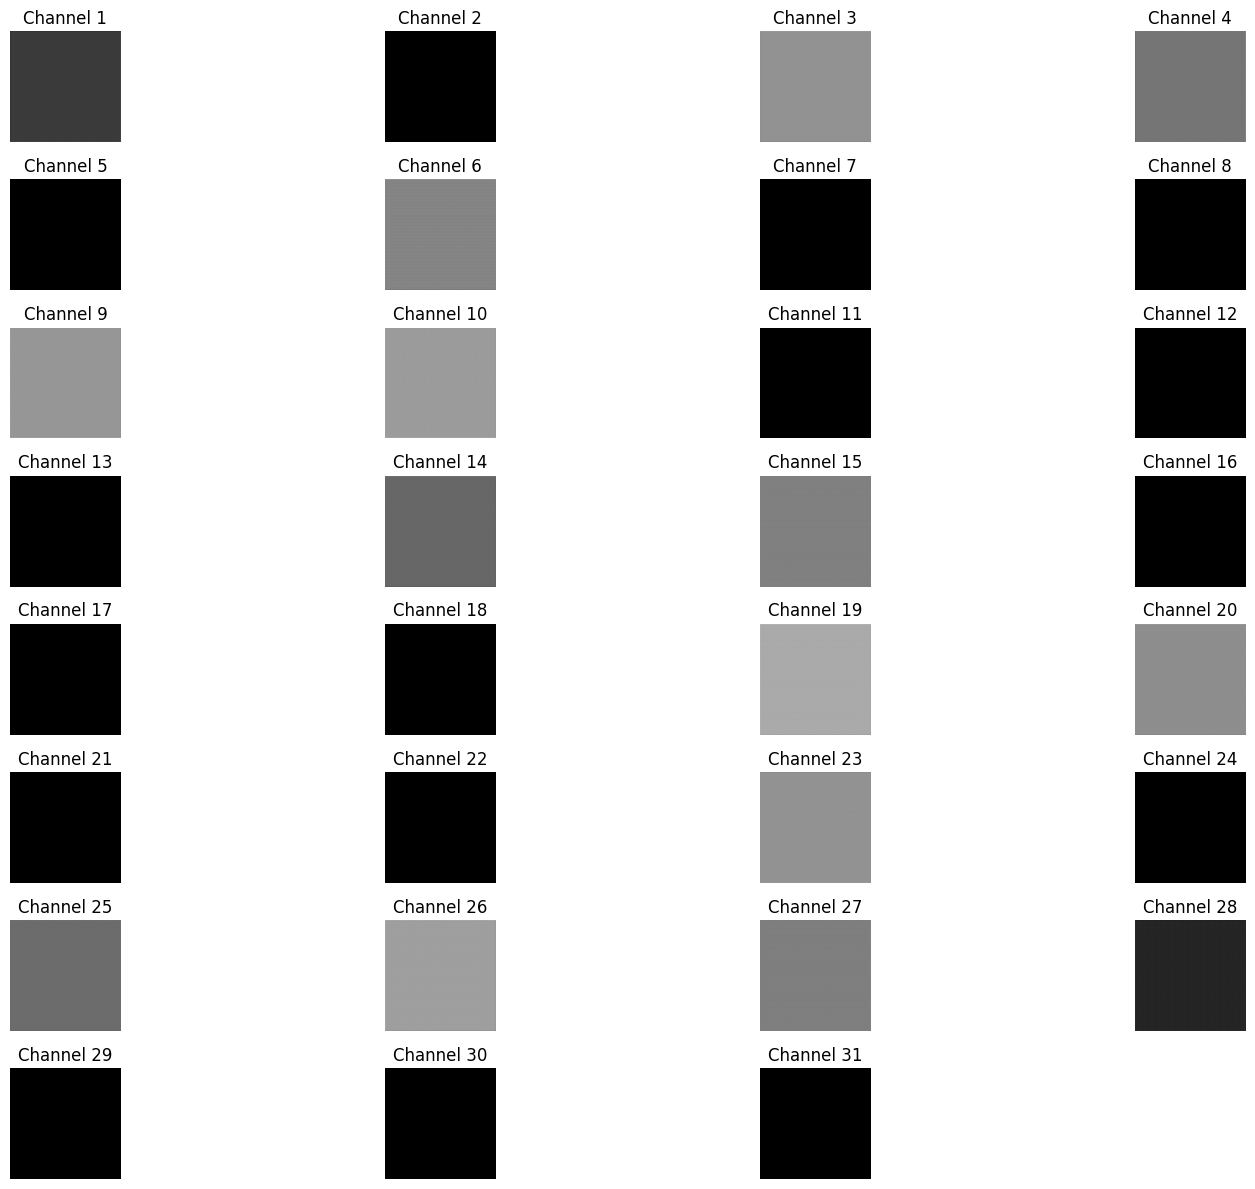

In [27]:
import matplotlib.pyplot as plt

# Assuming 'output' is the result from your model and has shape [1, 31, 482, 512]
# Remove the batch dimension if it exists
if len(output.shape) > 3:
    output = output.squeeze(0)

num_channels = output.shape[0]
num_rows = 8  # You can adjust this based on your preference
num_cols = (num_channels + num_rows - 1) // num_rows  # Calculate the number of columns

plt.figure(figsize=(16, 12))  # Adjust the figure size as needed

for i in range(num_channels):
    plt.subplot(num_rows, num_cols, i + 1)
    channel_data = output[i].cpu().numpy()  # Convert the channel data to a NumPy array
    plt.imshow(channel_data, cmap='gray')  # Display the image in grayscale
    plt.title(f'Channel {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## bigger visulaization

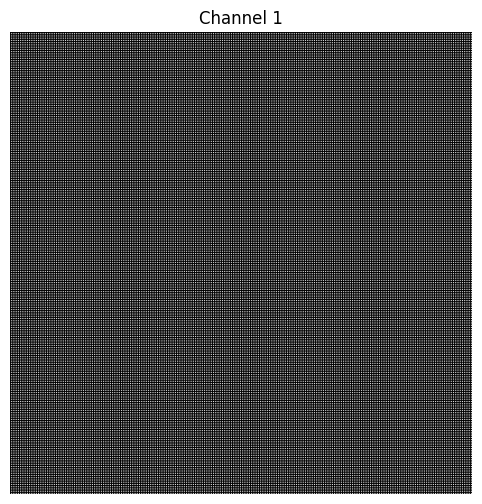

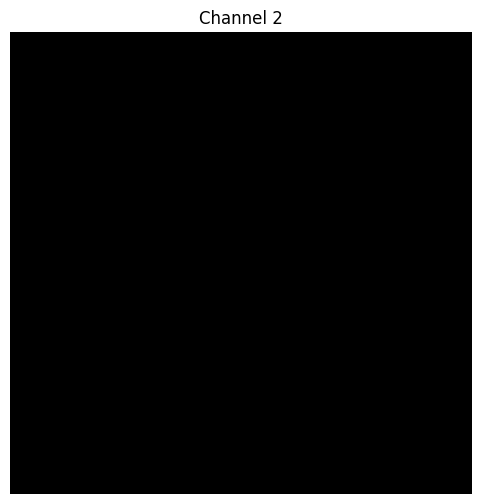

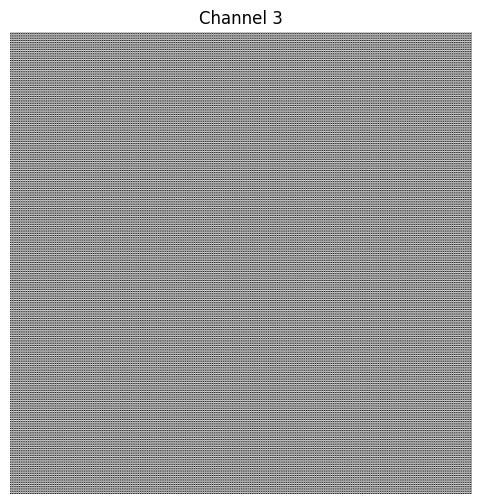

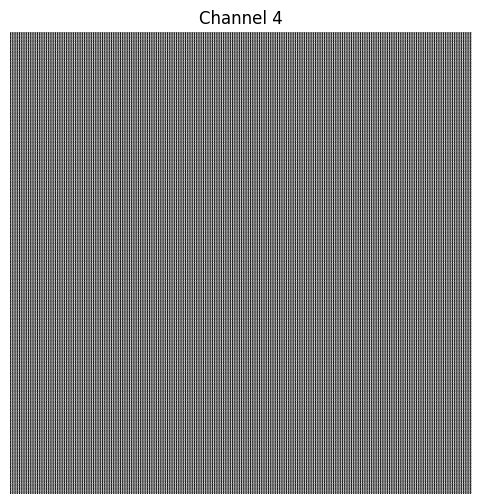

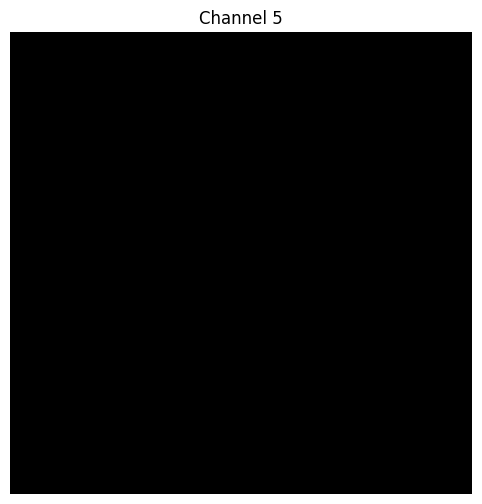

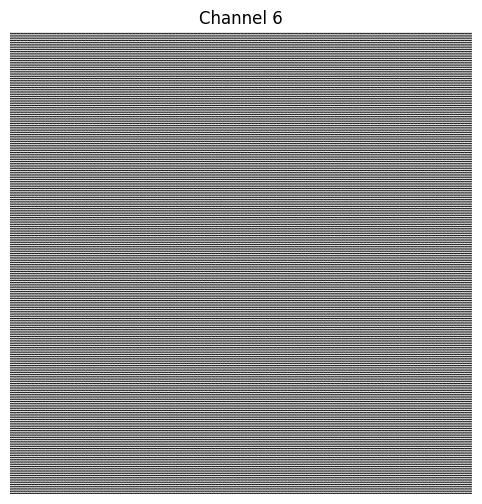

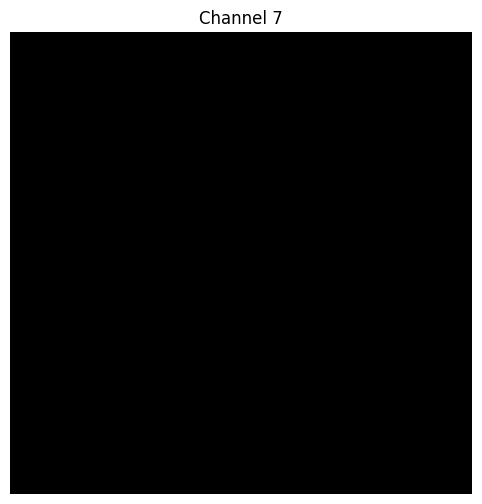

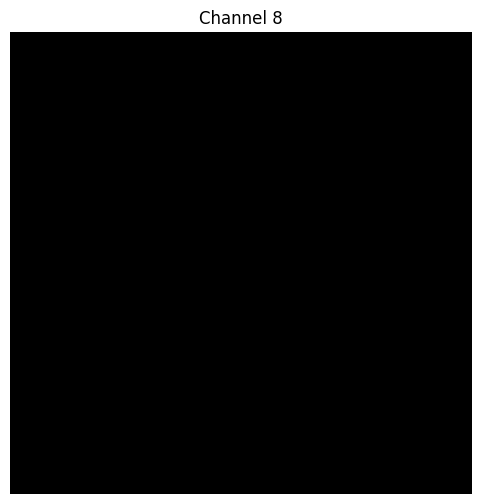

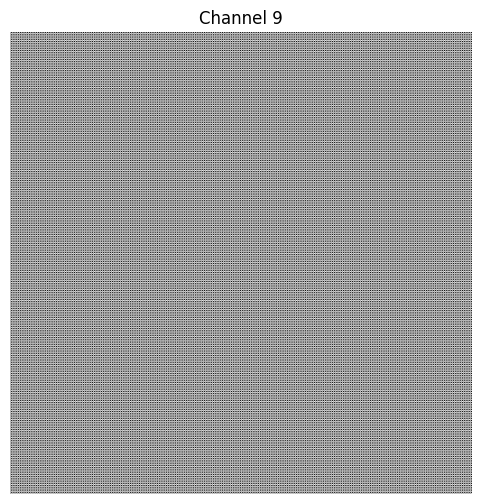

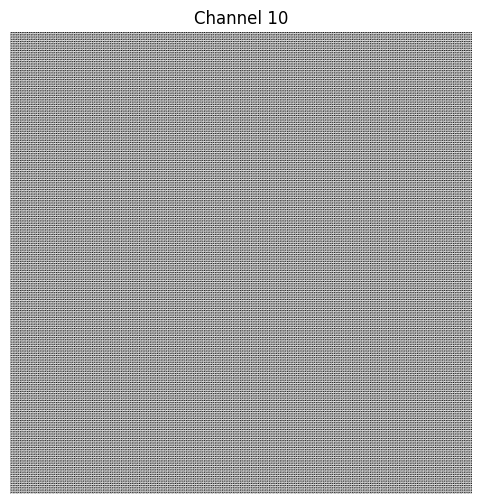

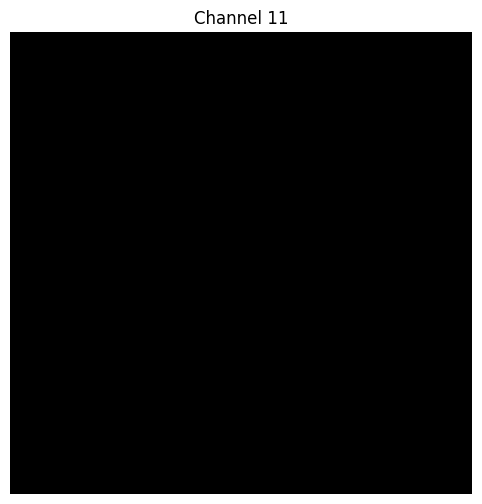

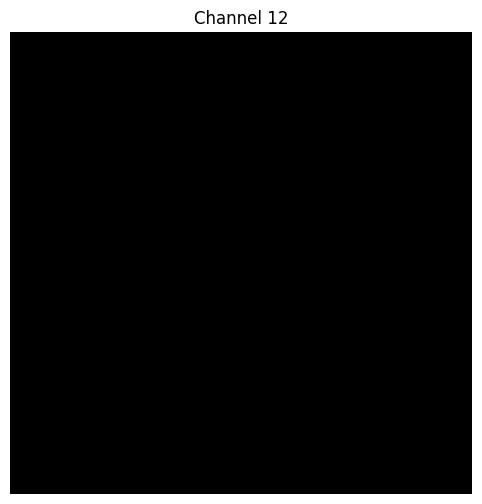

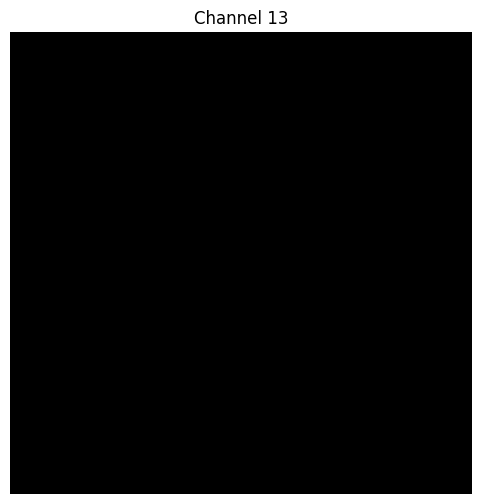

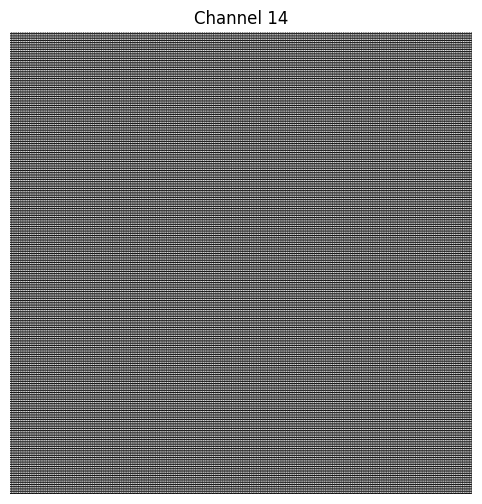

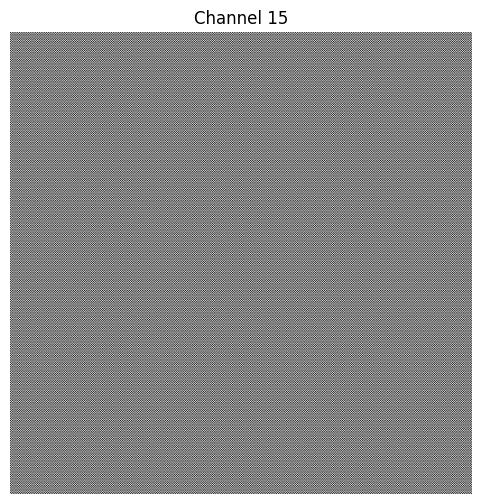

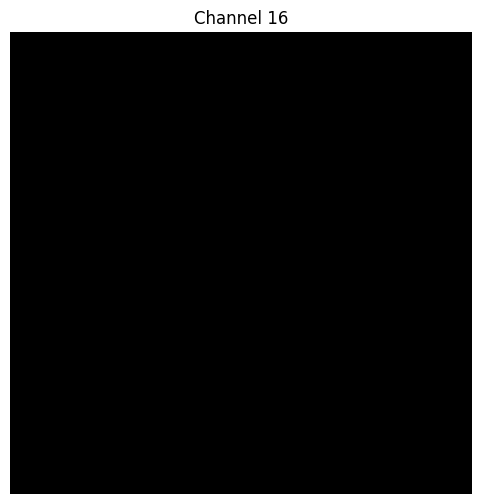

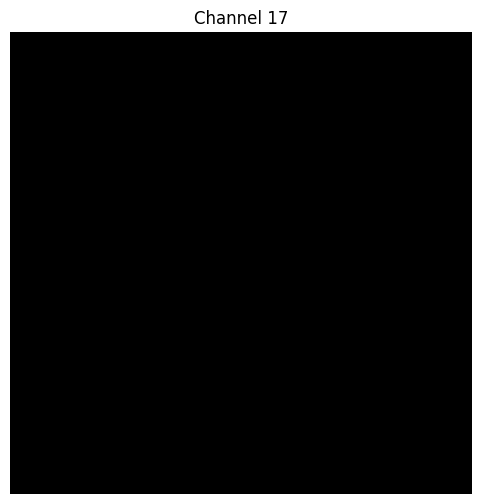

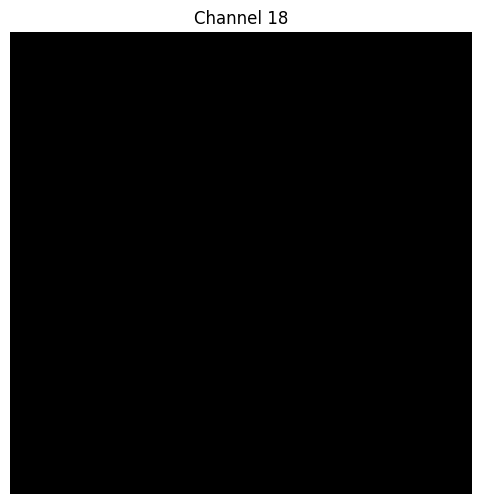

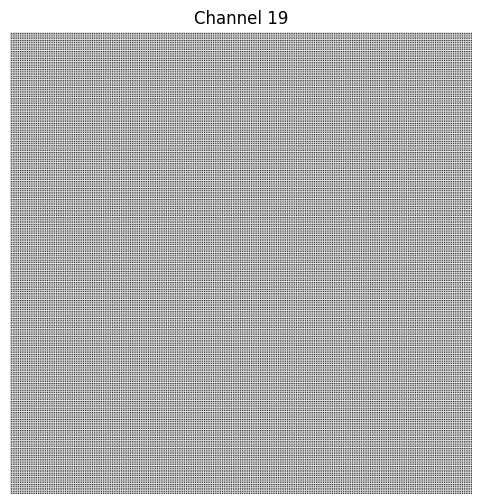

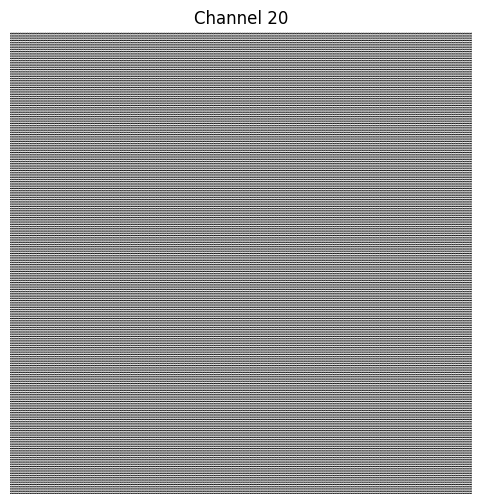

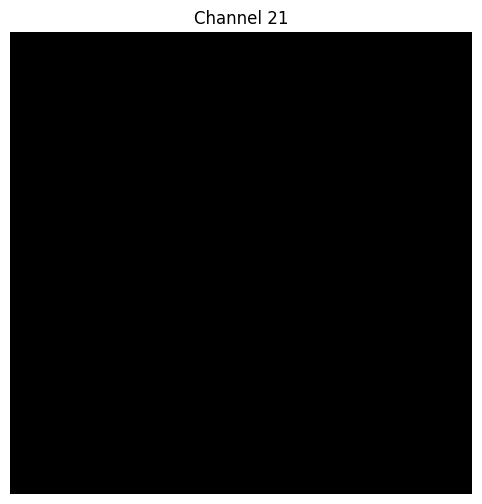

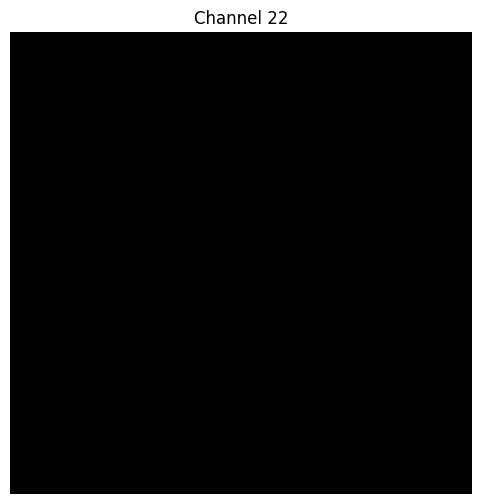

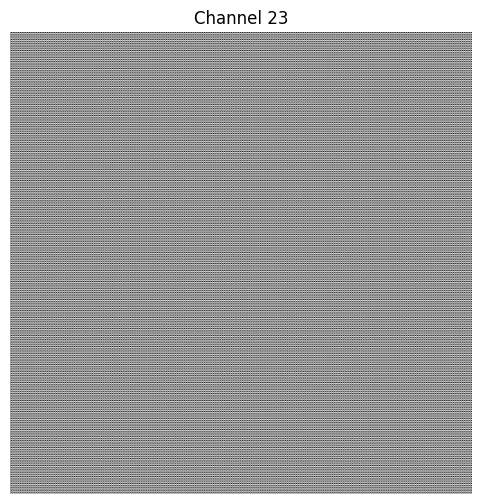

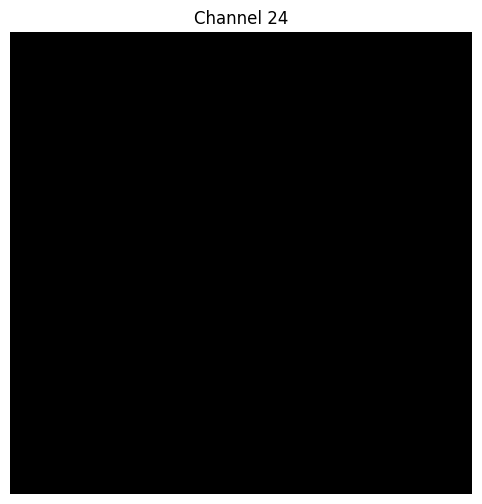

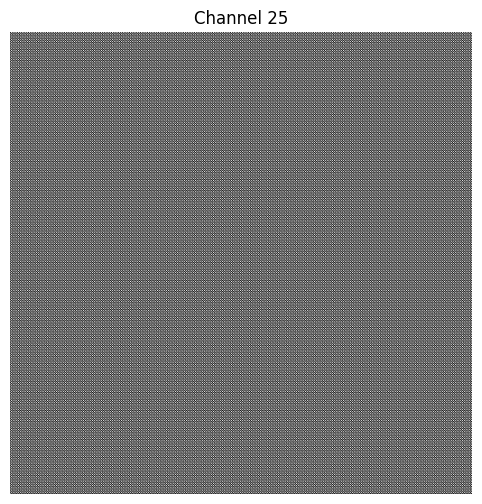

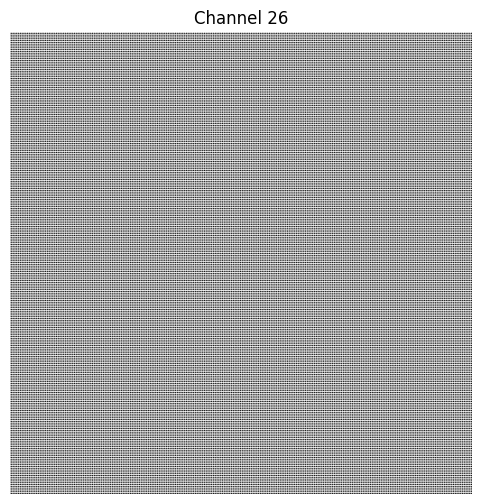

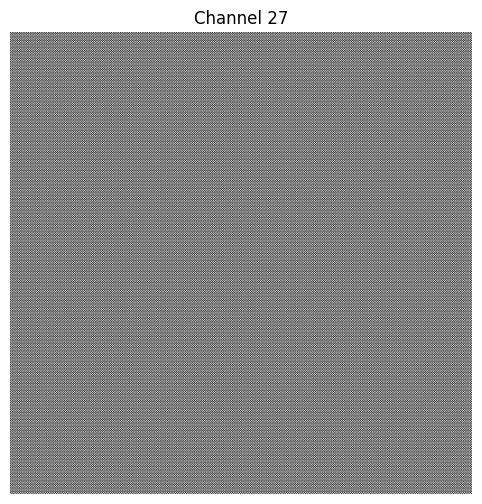

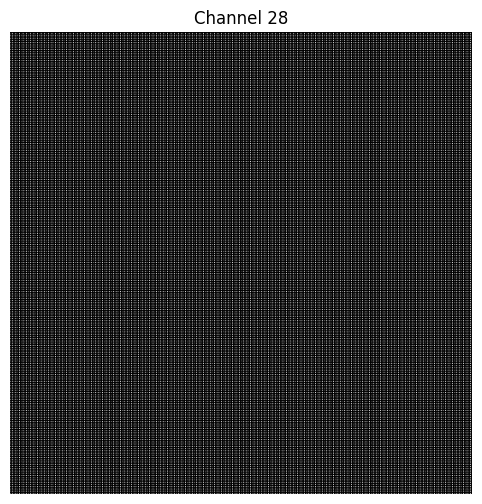

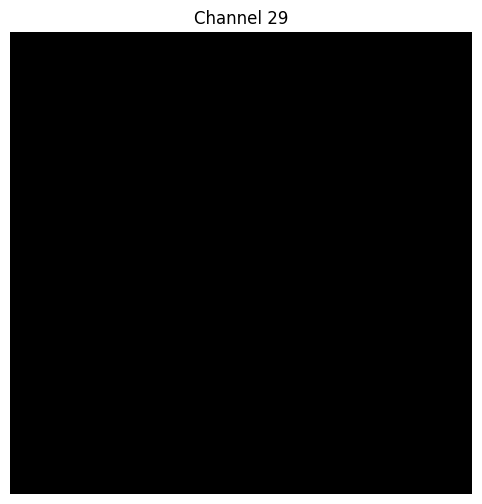

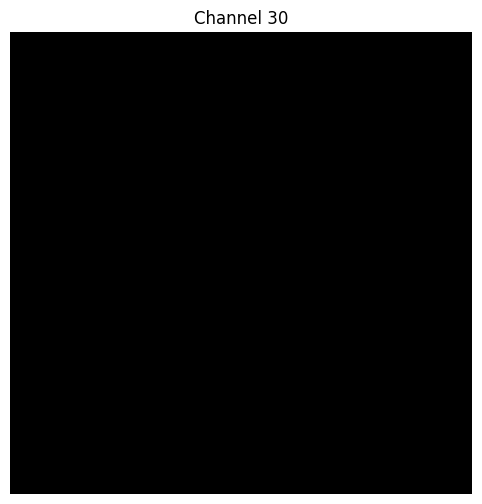

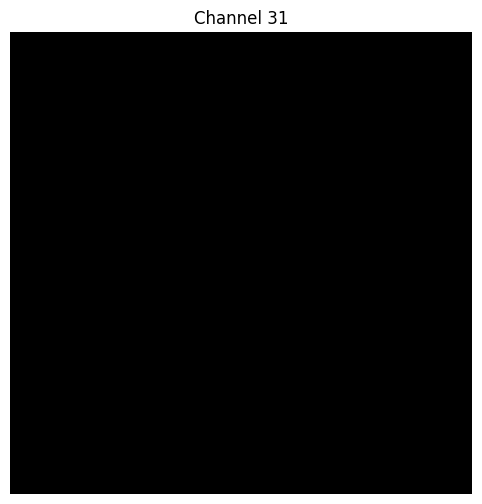

In [28]:
import matplotlib.pyplot as plt

# Assuming 'output' is the result from your model and has shape [1, 31, 482, 512]
# Remove the batch dimension if it exists
if len(output.shape) > 3:
    output = output.squeeze(0)

num_channels = output.shape[0]

# Loop through each channel and create a separate figure
for i in range(num_channels):
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    channel_data = output[i].cpu().numpy()  # Convert the channel data to a NumPy array
    plt.imshow(channel_data, cmap='gray')  # Display the image in grayscale
    plt.title(f'Channel {i + 1}')
    plt.axis('off')
    plt.show()


## val sam calculation

In [29]:
import torch
import math
from piq import ssim

criterion = SAMLoss()
# Define the RMSE Loss Function
def rmse_loss(outputs, targets):
    mse = torch.mean((outputs - targets) ** 2)
    rmse = torch.sqrt(mse)
    return rmse

# Define the PSNR Loss Function
def psnr_loss(outputs, targets, max_pixel=1.0):  # Assuming normalized data [0, 1]
    mse = torch.mean((outputs - targets) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * math.log10(max_pixel) - 10 * math.log10(mse)
    return psnr

# Assuming the model is already in evaluation mode and loaded
model.eval()

# Initialize variables to store total losses
total_sam_loss = 0.0
total_ssim = 0.0
total_rmse = 0.0
total_psnr = 0.0

with torch.no_grad():
    for batch_idx, (x_val, y_val) in enumerate(valid_loader):
        x_val, y_val = x_val.to(device).float(), y_val.to(device).float()

        # Forward pass
        outputs_val = model(x_val)

        # Ensure output size matches target size
        outputs_val = torch.nn.functional.interpolate(outputs_val, size=y_val.shape[2:], mode='bilinear', align_corners=False)

        # Min-max normalization for outputs and targets
        outputs_val_norm = (outputs_val - outputs_val.min()) / (outputs_val.max() - outputs_val.min() + 1e-8)
        y_val_norm = (y_val - y_val.min()) / (y_val.max() - y_val.min() + 1e-8)

        # Calculate losses
        sam_loss = criterion(outputs_val_norm, y_val_norm)
        ssim_val = ssim(outputs_val_norm, y_val_norm, data_range=1.0)
        rmse_val = rmse_loss(outputs_val_norm, y_val_norm)
        psnr_val = psnr_loss(outputs_val_norm, y_val_norm)

        # Accumulate the total losses
        total_sam_loss += sam_loss.item()
        total_ssim += ssim_val.item()
        total_rmse += rmse_val.item()
        total_psnr += psnr_val

# Calculate the average losses over all batches
avg_sam_loss = total_sam_loss / len(valid_loader)
avg_ssim = total_ssim / len(valid_loader)
avg_rmse = total_rmse / len(valid_loader)
avg_psnr = total_psnr / len(valid_loader)

# Print the average losses
print(f"Average SAM Loss: {avg_sam_loss:.4f}")
print(f"Average SSIM: {avg_ssim:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average PSNR: {avg_psnr:.4f}")


KeyboardInterrupt: 

In [ ]:
import torch
import math
from piq import ssim

criterion = SAMLoss()
# Define the RMSE Loss Function
def rmse_loss(outputs, targets):
    mse = torch.mean((outputs - targets) ** 2)
    rmse = torch.sqrt(mse)
    return rmse

# Define the PSNR Loss Function
def psnr_loss(outputs, targets, max_pixel=1.0):  # Assuming normalized data [0, 1]
    mse = torch.mean((outputs - targets) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * math.log10(max_pixel) - 10 * math.log10(mse)
    return psnr

# Assuming the model is already in evaluation mode and loaded
model.eval()

# Initialize variables to store total losses
total_sam_loss = 0.0
total_ssim = 0.0
total_rmse = 0.0
total_psnr = 0.0

with torch.no_grad():
    for batch_idx, (x_val, y_val) in enumerate(valid_loader):
        x_val, y_val = x_val.to(device).float(), y_val.to(device).float()

        # Forward pass
        outputs_val = model(x_val)

        # Ensure output size matches target size
        outputs_val = torch.nn.functional.interpolate(outputs_val, size=y_val.shape[2:], mode='bilinear', align_corners=False)

        # Min-max normalization for outputs and targets
        outputs_val_norm = (outputs_val - outputs_val.min()) / (outputs_val.max() - outputs_val.min() + 1e-8)
        y_val_norm = (y_val - y_val.min()) / (y_val.max() - y_val.min() + 1e-8)

        # Calculate losses
        sam_loss = criterion(outputs_val_norm, y_val_norm)
        ssim_val = ssim(outputs_val_norm, y_val_norm, data_range=1.0)
        rmse_val = rmse_loss(outputs_val_norm, y_val_norm)
        psnr_val = psnr_loss(outputs_val_norm, y_val_norm)

        # Accumulate the total losses
        total_sam_loss += sam_loss.item()
        total_ssim += ssim_val.item()
        total_rmse += rmse_val.item()
        total_psnr += psnr_val

# Calculate the average losses over all batches
avg_sam_loss = total_sam_loss / len(valid_loader)
avg_ssim = total_ssim / len(valid_loader)
avg_rmse = total_rmse / len(valid_loader)
avg_psnr = total_psnr / len(valid_loader)

# Print the average losses
print(f"Average SAM Loss: {avg_sam_loss:.4f}")
print(f"Average SSIM: {avg_ssim:.4f}")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average PSNR: {avg_psnr:.4f}")


In [ ]:
# Assuming model is already loaded and in evaluation mode
model.eval()
criterion = SAMLoss()

# Define a variable to store the total loss
total_val_loss = 0.0

# Iterate over the validation loader
with torch.no_grad():
    for batch_idx, (x_val, y_val) in enumerate(valid_loader):
        x_val, y_val = x_val.to(device).float(), y_val.to(device).float()

        # Forward pass
        outputs_val = model(x_val)
        
        # You may need to apply the same interpolation to outputs_val as in the training loop
        outputs_val = torch.nn.functional.interpolate(outputs_val, size=(482, 512), mode='bilinear', align_corners=False)

        # Calculate the loss
        val_loss = criterion(outputs_val, y_val)

        # Accumulate the total loss
        total_val_loss += val_loss.item()

# Calculate the average validation loss
avg_val_loss = total_val_loss / len(valid_loader)

# Print or use the average validation loss as needed
print(f"Average Validation Loss: {avg_val_loss:.4f}")


## train sam loss

In [ ]:
# Assuming model is already loaded and in evaluation mode
model.eval()
criterion = SAMLoss()
# Define a variable to store the total loss
total_train_loss = 0.0

# Iterate over the training loader
with torch.no_grad():
    for batch_idx, (x_train, y_train) in enumerate(train_loader):  # Use train_loader instead of val_loader
        x_train, y_train = x_train.to(device).float(), y_train.to(device).float()

        # Forward pass
        outputs_train = model(x_train)
        
        # You may need to apply the same interpolation to outputs_train as in the training loop
        outputs_train = torch.nn.functional.interpolate(outputs_train,size=(482, 512), mode='bilinear', align_corners=False)

        # Calculate the loss
        train_loss = criterion(outputs_train, y_train)

        # Accumulate the total loss
        total_train_loss += train_loss.item()

# Calculate the average training loss
avg_train_loss = total_train_loss / len(train_loader)

# Print or use the average training loss as needed
print(f"Average Training Loss: {avg_train_loss:.4f}")
